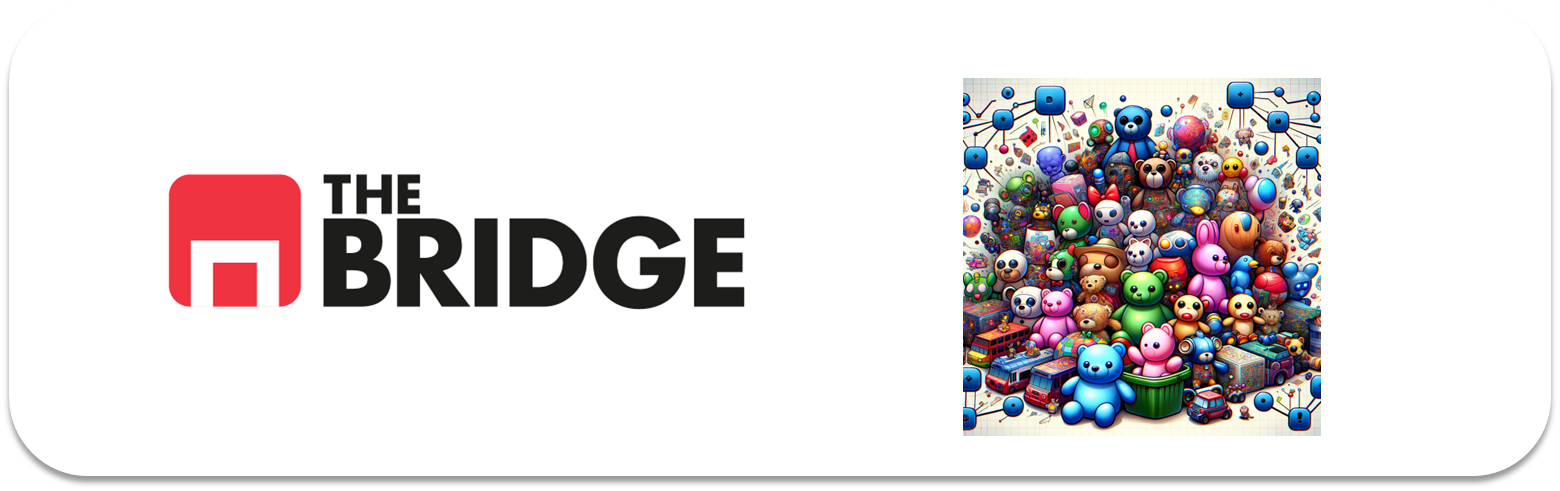

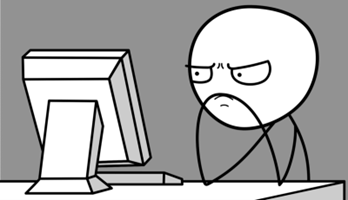

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [4]:
file_path = "./data/empowering_drinks.csv"
data = pd.read_csv(file_path)
data.head()

,Azúcares|Vitamínas del grupo B|Cafeína|Ácido Cítrico|Taurina
0,1.518612540989146|0.2320525409947431|1.0348189...
1,0.2462896270150547|-0.8279963232661995|0.73362...
2,0.1968790284141202|1.1093343596934533|1.215532...
3,1.6915496360924187|0.4879264047818666|1.466524...
4,0.2957002256159914|1.84040254194238|0.66335127...


In [8]:
column_names = ["Azúcares", "Vitaminas_B", "Cafeína", "Ácido_Cítrico", "Taurina"]
data_corrected = data.iloc[:, 0].str.split('|', expand=True)
data_corrected.columns = column_names


data_corrected = data_corrected.apply(pd.to_numeric)

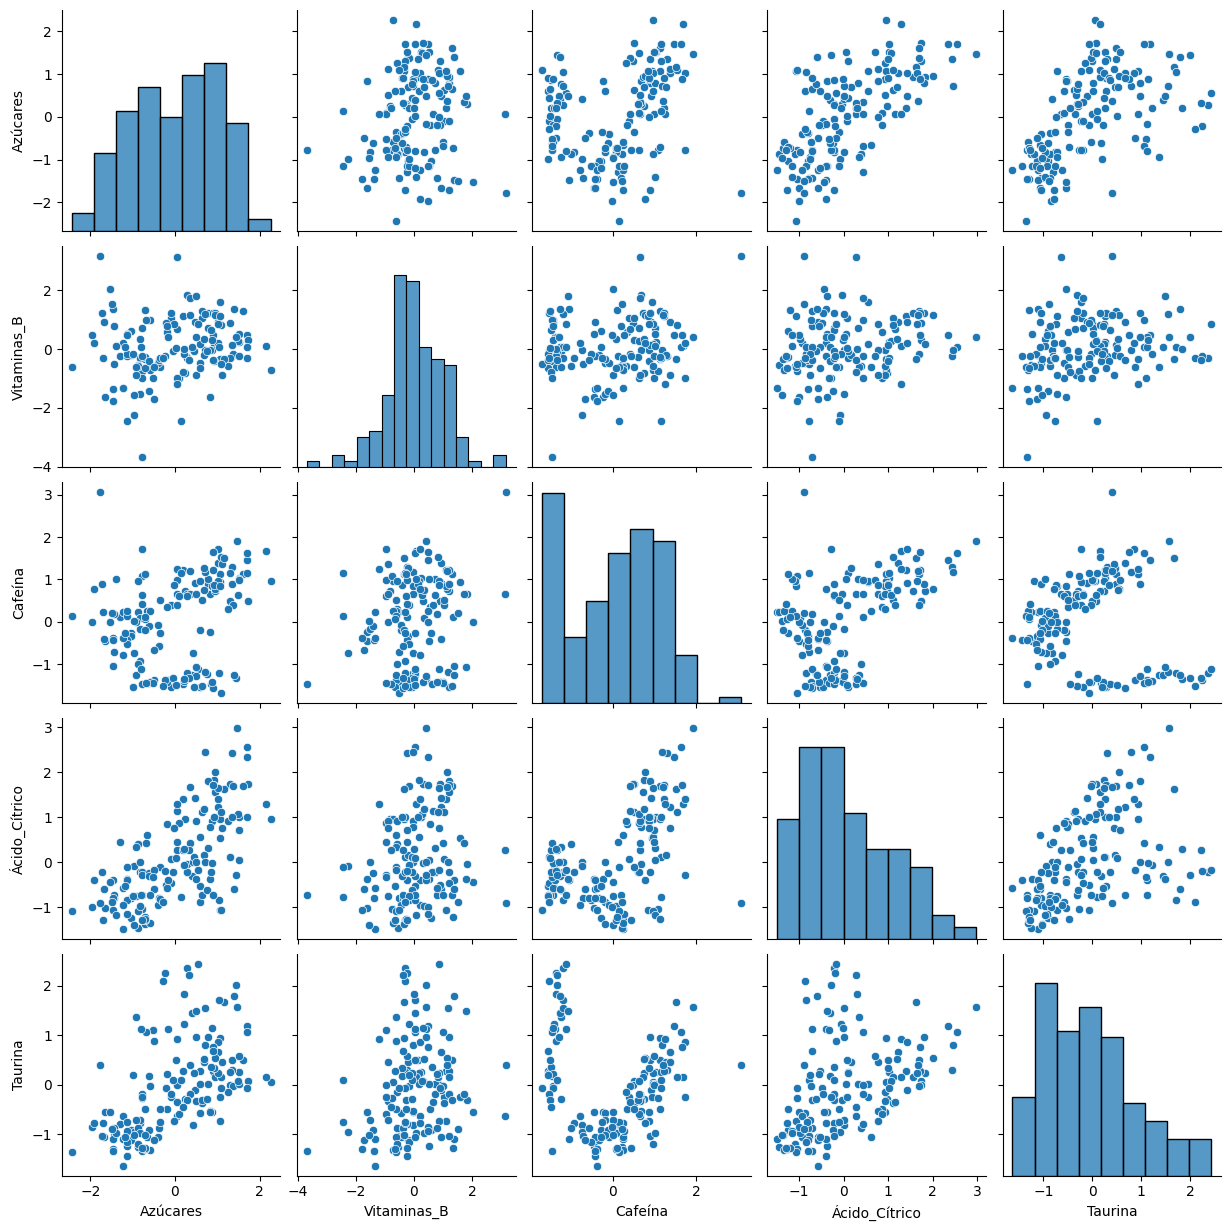

In [9]:
# MiniEDA: Visualización de features
sns.pairplot(data_corrected)
plt.show()

In [14]:
# Escalo los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_corrected)

In [15]:
# Aplico clustering jerárquico
hierarchical = AgglomerativeClustering(n_clusters=3)
labels_hierarchical = hierarchical.fit_predict(data_scaled)
data_corrected['Cluster_Hierarchical'] = labels_hierarchical

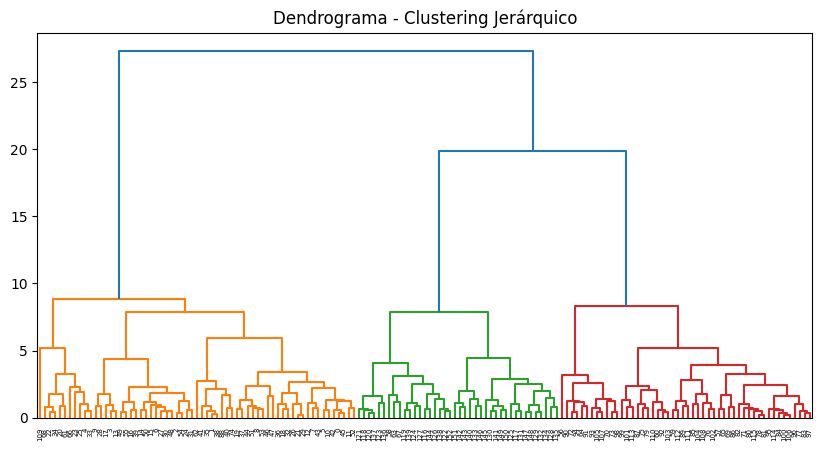

In [16]:
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrograma - Clustering Jerárquico")
plt.show()

In [18]:
# Aplico DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(data_scaled)
data_corrected['Cluster_DBSCAN'] = labels_dbscan

Silhouette Score - Clustering Jerárquico: 0.44329407208417826
Silhouette Score - DBSCAN: 0.44093132905029775


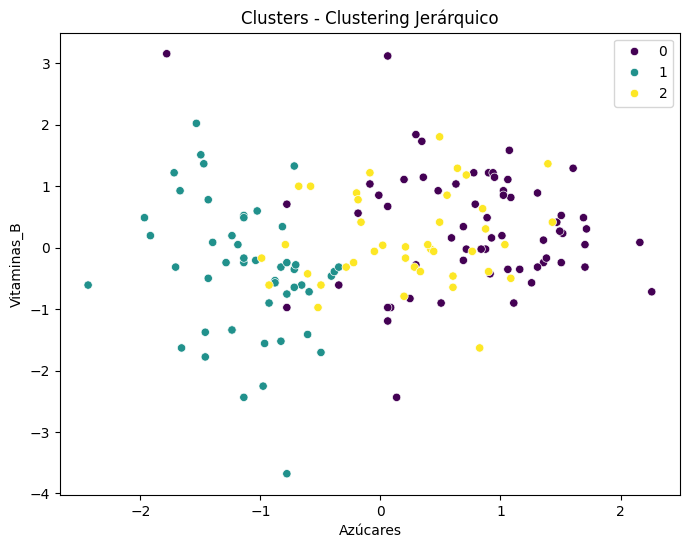

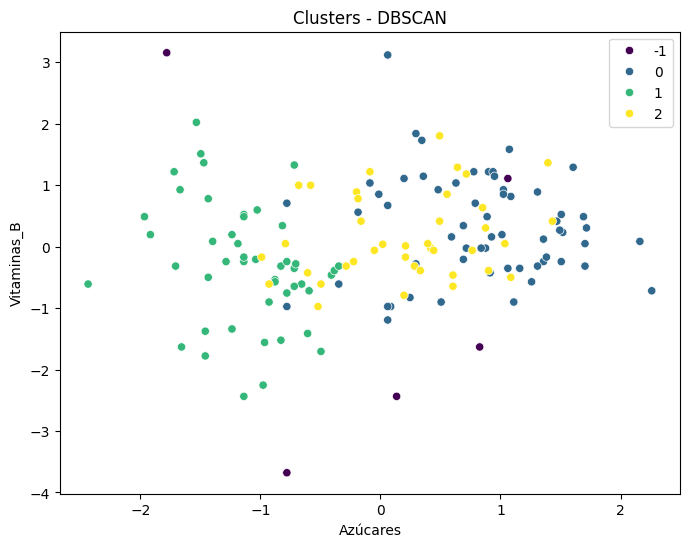

In [19]:
# Comparo resultados con Silhouette Score
silhouette_hierarchical = silhouette_score(data_scaled, labels_hierarchical)
print(f"Silhouette Score - Clustering Jerárquico: {silhouette_hierarchical}")

if len(set(labels_dbscan)) > 1:
    silhouette_dbscan = silhouette_score(data_scaled, labels_dbscan)
    print(f"Silhouette Score - DBSCAN: {silhouette_dbscan}")
else:
    print("Silhouette Score no aplicable para DBSCAN (un solo cluster detectado)")

# Resultados
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels, palette='viridis')
    plt.title(title)
    plt.show()

plot_clusters(data_corrected, labels_hierarchical, "Clusters - Clustering Jerárquico")
plot_clusters(data_corrected, labels_dbscan, "Clusters - DBSCAN")

### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [21]:
new_experiments_path = "./data/new_experiments.csv"
new_experiments = pd.read_csv(new_experiments_path)

new_experiments.info(), new_experiments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Azúcares|Vitamínas del grupo B|Cafeína|Ácido Cítrico|Taurina  6 non-null      object
dtypes: object(1)
memory usage: 176.0+ bytes


(None,
   Azúcares|Vitamínas del grupo B|Cafeína|Ácido Cítrico|Taurina
 0  1.481554592038443|0.3051593592196358|1.3661279...          
 1  0.6168691165220721|0.8900139050187754|0.583033...          
 2  -1.6807237184214292|0.3417127683320813|-0.3406...          
 3  -0.2848743079450018|-1.4128508690653407|-0.782...          
 4  -0.9272120897571632|0.6341400412316519|-1.5654...          )

In [30]:
# Separo la única columna en múltiples columnas
new_experiments_corrected = new_experiments.iloc[:, 0].str.split('|', expand=True)
new_experiments_corrected.columns = column_names
new_experiments_corrected = new_experiments_corrected.apply(pd.to_numeric)

# Aseguro que solo se usen las columnas originales y en el mismo orden
new_experiments_corrected = new_experiments_corrected[column_names]

# Fuerzo que las columnas de new_experiments_corrected sean exactamente las mismas
new_experiments_corrected = new_experiments_corrected.reindex(columns=column_names)

In [34]:
# Uso clustering jerárquico para clasificar nuevos experimentos
new_labels = hierarchical.fit_predict(new_experiments_corrected)
new_experiments_corrected['Cluster_Hierarchical'] = new_labels

In [36]:
# Guardo
new_experiments_corrected.to_csv("./data/new_experiments_clustered.csv", index=False)
print("Segmentación de nuevos experimentos completada y guardada.")

Segmentación de nuevos experimentos completada y guardada.


### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.